<a href="https://colab.research.google.com/github/manikcb/all-my-assignments/blob/main/KEARATOCONUS%20DETECTION%20USING%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt

In [47]:
df = pd.read_csv(r"/content/DATABASE-KERATOCONUSORC3.csv")

In [48]:
df.head(10)

,Edad,RL,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,...,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,SRS
0,24,H,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,...,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,M
1,24,H,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,...,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,H
2,20,H,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,...,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,H
3,20,H,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,...,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,M
4,23,M,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,...,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,M
5,23,M,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,0.18,...,0.270,-0.052,0.012,-0.042,0.068,-0.055,-0.040,0.013,0.105,M
6,68,M,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,0.08,...,-0.099,0.053,-0.022,0.045,0.056,-0.050,-0.077,-0.080,0.242,H
7,68,M,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,0.05,...,0.007,0.013,0.018,0.047,0.200,0.085,-0.054,-0.097,0.459,M
8,60,M,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,0.08,...,-0.090,0.054,-0.040,0.045,0.056,-0.006,0.092,-0.018,0.249,H
9,60,M,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,0.04,...,0.006,0.012,0.016,0.047,0.200,-0.097,-0.074,-0.091,0.440,M


In [49]:
df=pd.get_dummies(df, columns=['RL','SRS'])
df.head(10)

,Edad,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,...,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,RL_H,RL_M,SRS_H,SRS_M
0,24,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,...,-0.429,0.110,0.038,-0.035,0.122,0.253,1,0,0,1
1,24,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,...,0.191,0.080,-0.047,-0.029,-0.047,0.201,1,0,1,0
2,20,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,...,0.113,-0.091,-0.037,-0.292,0.035,-0.085,1,0,1,0
3,20,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,...,-0.006,0.093,0.190,-0.165,0.040,-0.068,1,0,0,1
4,23,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,...,-0.129,0.050,0.158,-0.104,-0.138,0.131,0,1,0,1
5,23,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,0.18,-6.0,...,-0.042,0.068,-0.055,-0.040,0.013,0.105,0,1,0,1
6,68,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,0.08,-6.3,...,0.045,0.056,-0.050,-0.077,-0.080,0.242,0,1,1,0
7,68,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,0.05,-6.3,...,0.047,0.200,0.085,-0.054,-0.097,0.459,0,1,0,1
8,60,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,0.08,-6.1,...,0.045,0.056,-0.006,0.092,-0.018,0.249,0,1,1,0
9,60,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,0.04,-6.3,...,0.047,0.200,-0.097,-0.074,-0.091,0.440,0,1,0,1


In [51]:
df.head(10)

,Edad,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,...,COMA CORNEA 90,TREFOIL 0º,TREFOIL 30º,TETRAFOIL 0º,"TETRAFOIL 22,5º",ABERR. ESF,RL_H,RL_M,SRS_H,SRS_M
0,24,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,...,-0.429,0.110,0.038,-0.035,0.122,0.253,1,0,0,1
1,24,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,...,0.191,0.080,-0.047,-0.029,-0.047,0.201,1,0,1,0
2,20,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,...,0.113,-0.091,-0.037,-0.292,0.035,-0.085,1,0,1,0
3,20,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,...,-0.006,0.093,0.190,-0.165,0.040,-0.068,1,0,0,1
4,23,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,...,-0.129,0.050,0.158,-0.104,-0.138,0.131,0,1,0,1
5,23,41.3,152.6,43.9,62.6,42.6,44.5,-0.27,0.18,-6.0,...,-0.042,0.068,-0.055,-0.040,0.013,0.105,0,1,0,1
6,68,44.4,116.8,45.7,26.8,45.1,46.4,-0.17,0.08,-6.3,...,0.045,0.056,-0.050,-0.077,-0.080,0.242,0,1,1,0
7,68,43.2,72.6,47.7,162.6,45.3,47.9,-0.14,0.05,-6.3,...,0.047,0.200,0.085,-0.054,-0.097,0.459,0,1,0,1
8,60,44.5,115.0,45.0,25.0,45.0,46.7,-0.11,0.08,-6.1,...,0.045,0.056,-0.006,0.092,-0.018,0.249,0,1,1,0
9,60,43.0,81.0,47.0,171.0,45.4,48.0,-0.15,0.04,-6.3,...,0.047,0.200,-0.097,-0.074,-0.091,0.440,0,1,0,1


In [53]:
y = df['RL_H']
X=df.drop(columns=['RL_H','RL_M','SRS_H'])


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
print(len(X_train))
print(len(X_test))

574
246


In [56]:
model = SVC(kernel='linear')

In [57]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
predictions = model.predict(X_test)
print(predictions)

[1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1]


In [59]:
percentage = model.score(X_test, y_test)

In [71]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[111   4]
 [ 11 120]]
Test Set: 246
Accuracy = 93.90243902439023 %


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.97      0.92      0.94       131

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



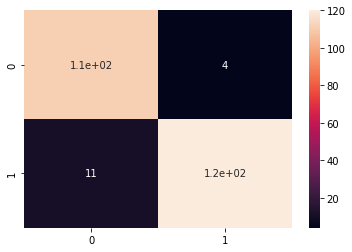

In [72]:
import seaborn as sns
sns.heatmap(res, annot=True)

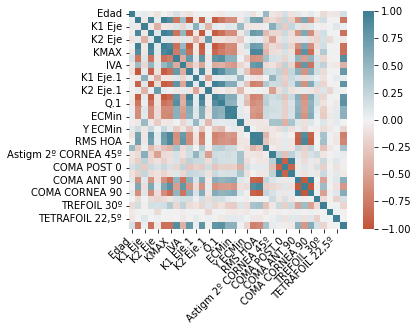

In [65]:
data = pd.read_csv('/content/DATABASE-KERATOCONUSORC3.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

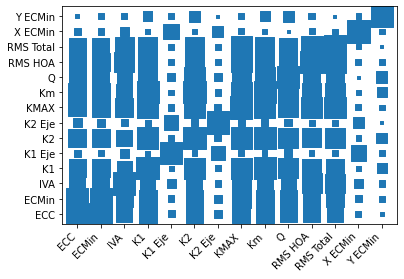

In [68]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('/content/DATABASE-KERATOCONUSORC3.csv')
columns = ['K1','K1 Eje','K2','K2 Eje','Km','KMAX','Q','IVA','K1','ECC','ECMin','X ECMin','Y ECMin','RMS Total','RMS HOA']
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)